In [1]:
# Importing Necessary Libraries
import numpy as np 
import pandas as pd 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
# Importing the fake and real news
df1 = pd.read_csv('True.csv')
df2 = pd.read_csv('Fake.csv')

In [3]:
df1= df1[ :2000]
df2 = df2[:2000]

In [4]:
df1.shape

(2000, 4)

In [5]:
# showing the top 5 records of true news
df1.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
# showing the top 5 records of fake news
df2.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
#Target variable for fake news
df2['output']=0

#Target variable for true news
df1['output']=1

In [8]:
# concating the two different data set to one
df = [df1, df2]
df = pd.concat(df)
df

,title,text,subject,date,output
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
1995,Watch Legendary Reporter Ted Koppel Tell Hann...,"With the cool, calm authority that comes with ...",News,"March 26, 2017",0
1996,Someone Just Showed What Trump Was Doing At H...,One day after Trump had his 12th golfing trip ...,News,"March 26, 2017",0
1997,Trump Accidentally Makes Democrats Look Great...,Less than 24 hours after Trump claimed he woul...,News,"March 26, 2017",0
1998,Kremlin Threatens Trump: Stop Leaking Like A ...,Snitches get stitches is Kremlin s message t...,News,"March 26, 2017",0


In [9]:
# now creating the pandas profiling report
# profile = ProfileReport(df)
# profile.to_file(output_file="news.html")

In [10]:
# shape of the merged data set
df.shape

(4000, 5)

In [11]:
# first 5 rows of the final data set
df.head()

,title,text,subject,date,output
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [12]:
#printing the column names of the data frame 
df.columns

Index(['title', 'text', 'subject', 'date', 'output'], dtype='object')

<AxesSubplot:title={'center':'fake news'}, xlabel='output', ylabel='count'>

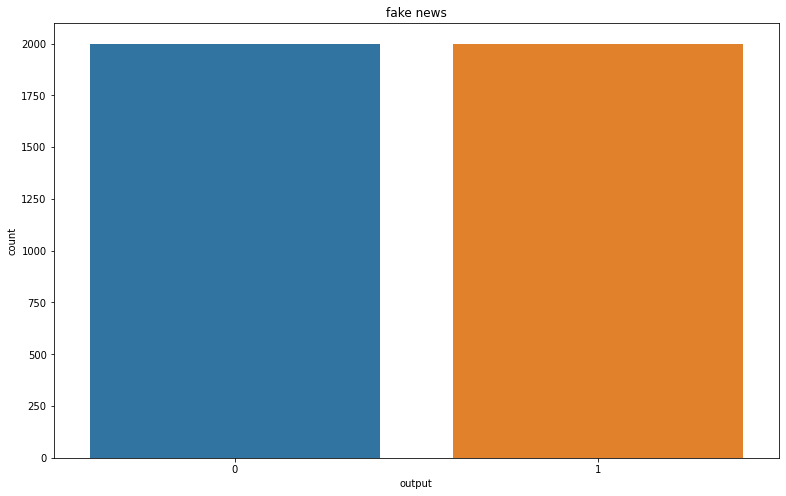

In [13]:
# plotting the ocunt plot for the target column
plt.figure(figsize=(13,8))
plt.title('fake news')
sns.countplot(x='output',data=df)

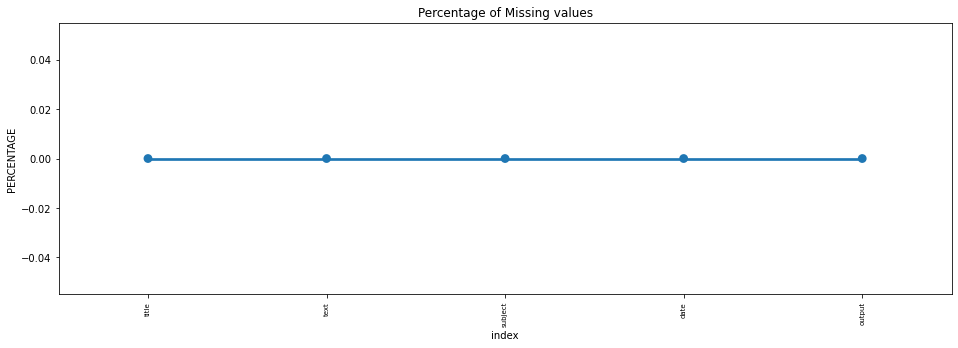

In [14]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [15]:
# removing all the columns except text and output
df = df[['text','output']]

In [16]:
df.head()

,text,output
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [17]:
def preprocess_data(df):
    
    # Convert text to lowercase
    df['text'] = df['text'].str.strip().str.lower()
    return df

In [18]:
df = preprocess_data(df)

C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
df.head()

,text,output
0,washington (reuters) - the head of a conservat...,1
1,washington (reuters) - transgender people will...,1
2,washington (reuters) - the special counsel inv...,1
3,washington (reuters) - trump campaign adviser ...,1
4,seattle/washington (reuters) - president donal...,1


In [20]:
# Split into training and testing data
x = df['text']
y = df['output']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [21]:
y.value_counts()

1    1500
0    1500
Name: output, dtype: int64

In [22]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [23]:
x.shape

(3000, 32511)

In [24]:
# Modelling
from sklearn.tree import DecisionTreeClassifier


In [25]:
dt = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
dt.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [26]:
dt.score(x_test, y_test)

0.997

In [27]:
result = dt.predict(vec.transform([''' The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. “We need to do DACA clean,” she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. ",politicsNews,"December 31, 2017  ''']))
if result==0:
    print("This is a Fake news")
else:
    print("This is a Real news")


This is a Fake news


In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

rf.fit(x, y)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [29]:
rf.score(x_test, y_test)

0.995

In [30]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x,y)

C:\Program Files\Python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:31:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
xgb.score(x_test, y_test)

0.998

In [32]:
result = xgb.predict(vec.transform(['''FBI Russia probe helped by Australian diplomat tip-off: NYT,"WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times reported on Saturday. The conversation between Papadopoulos and the diplomat, Alexander Downer, in London was a driving factor behind the FBI’s decision to open a counter-intelligence investigation of Moscow’s contacts with the Trump campaign, the Times reported. Two months after the meeting, Australian officials passed the information that came from Papadopoulos to their American counterparts when leaked Democratic emails began appearing online, according to the newspaper, which cited four current and former U.S. and foreign officials. Besides the information from the Australians, the probe by the Federal Bureau of Investigation was also propelled by intelligence from other friendly governments, including the British and Dutch, the Times said. Papadopoulos, a Chicago-based international energy lawyer, pleaded guilty on Oct. 30 to lying to FBI agents about contacts with people who claimed to have ties to top Russian officials. It was the first criminal charge alleging links between the Trump campaign and Russia. The White House has played down the former aide’s campaign role, saying it was “extremely limited” and that any actions he took would have been on his own. The New York Times, however, reported that Papadopoulos helped set up a meeting between then-candidate Donald Trump and Egyptian President Abdel Fattah al-Sisi and edited the outline of Trump’s first major foreign policy speech in April 2016. The federal investigation, which is now being led by Special Counsel Robert Mueller, has hung over Trump’s White House since he took office almost a year ago. Some Trump allies have recently accused Mueller’s team of being biased against the Republican president. Lawyers for Papadopoulos did not immediately respond to requests by Reuters for comment. Mueller’s office declined to comment. Trump’s White House attorney, Ty Cobb, declined to comment on the New York Times report. “Out of respect for the special counsel and his process, we are not commenting on matters such as this,” he said in a statement. Mueller has charged four Trump associates, including Papadopoulos, in his investigation. Russia has denied interfering in the U.S. election and Trump has said there was no collusion between his campaign and Moscow. ",politicsNews,"December 30, 2017 "
Trump wants Postal Service to charge 'much more' for Amazon shipments,"SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to ship packages for Amazon (AMZN.O), picking another fight with an online retail giant he has criticized in the past.     “Why is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE!” Trump wrote on Twitter.  The president’s tweet drew fresh attention to the fragile finances of the Postal Service at a time when tens of millions of parcels have just been shipped all over the country for the holiday season.  The U.S. Postal Service, which runs at a big loss, is an independent agency within the federal government and does not receive tax dollars for operating expenses, according to its website.  Package delivery has become an increasingly important part of its business as the Internet has led to a sharp decline in the amount of first-class letters. The president does not determine postal rates. They are set by the Postal Regulatory Commission, an independent government agency with commissioners selected by the president from both political parties. That panel raised prices on packages by almost 2 percent in November.  Amazon was founded by Jeff Bezos, who remains the chief executive officer of the retail company and is the richest person in the world, according to Bloomberg News. Bezos also owns The Washington Post, a newspaper Trump has repeatedly railed against in his criticisms of the news media. In tweets over the past year, Trump has said the “Amazon Washington Post” fabricated stories. He has said Amazon does not pay sales tax, which is not true, and so hurts other retailers, part of a pattern by the former businessman and reality television host of periodically turning his ire on big American companies since he took office in January. Daniel Ives, a research analyst at GBH Insights, said Trump’s comment could be taken as a warning to the retail giant. However, he said he was not concerned for Amazon. “We do not see any price hikes in the future. However, that is a risk that Amazon is clearly aware of and (it) is building out its distribution (system) aggressively,” he said. Amazon has shown interest in the past in shifting into its own delivery service, including testing drones for deliveries. In 2015, the company spent $11.5 billion on shipping, 46 percent of its total operating expenses that year.  Amazon shares were down 0.86 percent to $1,175.90 by early afternoon. Overall, U.S. stock prices were down slightly on Friday.  Satish Jindel, president of ShipMatrix Inc, which analyzes shipping data, disputed the idea that the Postal Service charges less than United Parcel Service Inc (UPS.N) and FedEx Corp (FDX.N), the other biggest players in the parcel delivery business in the United States. Many customers get lower rates from UPS and FedEx than they would get from the post office for comparable services, he said. The Postal Service delivers about 62 percent of Amazon packages, for about 3.5 to 4 million a day during the current peak year-end holiday shipping season, Jindel said. The Seattle-based company and the post office have an agreement in which mail carriers take Amazon packages on the last leg of their journeys, from post offices to customers’ doorsteps. Amazon’s No. 2 carrier is UPS, at 21 percent, and FedEx is third, with 8 percent or so, according to Jindel. Trump’s comment tapped into a debate over whether Postal Service pricing has kept pace with the rise of e-commerce, which has flooded the mail with small packages.Private companies like UPS have long claimed the current system unfairly undercuts their business. Steve Gaut, a spokesman for UPS, noted that the company values its “productive relationship” with the postal service, but that it has filed with the Postal Regulatory Commission its concerns about the postal service’s methods for covering costs. Representatives for Amazon, the White House, the U.S. Postal Service and FedEx declined comment or were not immediately available for comment on Trump’s tweet. According to its annual report, the Postal Service lost $2.74 billion this year, and its deficit has ballooned to $61.86 billion.  While the Postal Service’s revenue for first class mail, marketing mail and periodicals is flat or declining, revenue from package delivery is up 44 percent since 2014 to $19.5 billion in the fiscal year ended Sept. 30, 2017. But it also lost about $2 billion in revenue when a temporary surcharge expired in April 2016. According to a Government Accountability Office report in February, the service is facing growing personnel expenses, particularly $73.4 billion in unfunded pension and benefits liabilities. The Postal Service has not announced any plans to cut costs. By law, the Postal Service has to set prices for package delivery to cover the costs attributable to that service. But the postal service allocates only 5.5 percent of its total costs to its business of shipping packages even though that line of business is 28 percent of its total revenue. ",politicsNews,"December 29, 2017 ''']))
if result==0:
    print("This is a Fake news")
else:
    print("This is a Real news")

This is a Real news


In [33]:
result = xgb.predict(vec.transform(['''Trump wants Postal Service to charge 'much more' for Amazon shipments,"SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to ship packages for Amazon (AMZN.O), picking another fight with an online retail giant he has criticized in the past.     “Why is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE!” Trump wrote on Twitter.  The president’s tweet drew fresh attention to the fragile finances of the Postal Service at a time when tens of millions of parcels have just been shipped all over the country for the holiday season.  The U.S. Postal Service, which runs at a big loss, is an independent agency within the federal government and does not receive tax dollars for operating expenses, according to its website.  Package delivery has become an increasingly important part of its business as the Internet has led to a sharp decline in the amount of first-class letters. The president does not determine postal rates. They are set by the Postal Regulatory Commission, an independent government agency with commissioners selected by the president from both political parties. That panel raised prices on packages by almost 2 percent in November.  Amazon was founded by Jeff Bezos, who remains the chief executive officer of the retail company and is the richest person in the world, according to Bloomberg News. Bezos also owns The Washington Post, a newspaper Trump has repeatedly railed against in his criticisms of the news media. In tweets over the past year, Trump has said the “Amazon Washington Post” fabricated stories. He has said Amazon does not pay sales tax, which is not true, and so hurts other retailers, part of a pattern by the former businessman and reality television host of periodically turning his ire on big American companies since he took office in January. Daniel Ives, a research analyst at GBH Insights, said Trump’s comment could be taken as a warning to the retail giant. However, he said he was not concerned for Amazon. “We do not see any price hikes in the future. However, that is a risk that Amazon is clearly aware of and (it) is building out its distribution (system) aggressively,” he said. Amazon has shown interest in the past in shifting into its own delivery service, including testing drones for deliveries. In 2015, the company spent $11.5 billion on shipping, 46 percent of its total operating expenses that year.  Amazon shares were down 0.86 percent to $1,175.90 by early afternoon. Overall, U.S. stock prices were down slightly on Friday.  Satish Jindel, president of ShipMatrix Inc, which analyzes shipping data, disputed the idea that the Postal Service charges less than United Parcel Service Inc (UPS.N) and FedEx Corp (FDX.N), the other biggest players in the parcel delivery business in the United States. Many customers get lower rates from UPS and FedEx than they would get from the post office for comparable services, he said. The Postal Service delivers about 62 percent of Amazon packages, for about 3.5 to 4 million a day during the current peak year-end holiday shipping season, Jindel said. The Seattle-based company and the post office have an agreement in which mail carriers take Amazon packages on the last leg of their journeys, from post offices to customers’ doorsteps. Amazon’s No. 2 carrier is UPS, at 21 percent, and FedEx is third, with 8 percent or so, according to Jindel. Trump’s comment tapped into a debate over whether Postal Service pricing has kept pace with the rise of e-commerce, which has flooded the mail with small packages.Private companies like UPS have long claimed the current system unfairly undercuts their business. Steve Gaut, a spokesman for UPS, noted that the company values its “productive relationship” with the postal service, but that it has filed with the Postal Regulatory Commission its concerns about the postal service’s methods for covering costs. Representatives for Amazon, the White House, the U.S. Postal Service and FedEx declined comment or were not immediately available for comment on Trump’s tweet. According to its annual report, the Postal Service lost $2.74 billion this year, and its deficit has ballooned to $61.86 billion.  While the Postal Service’s revenue for first class mail, marketing mail and periodicals is flat or declining, revenue from package delivery is up 44 percent since 2014 to $19.5 billion in the fiscal year ended Sept. 30, 2017. But it also lost about $2 billion in revenue when a temporary surcharge expired in April 2016. According to a Government Accountability Office report in February, the service is facing growing personnel expenses, particularly $73.4 billion in unfunded pension and benefits liabilities. The Postal Service has not announced any plans to cut costs. By law, the Postal Service has to set prices for package delivery to cover the costs attributable to that service. But the postal service allocates only 5.5 percent of its total costs to its business of shipping packages even though that line of business is 28 percent of its total revenue. ",politicsNews,"December 29, 2017''']))
if result==0:
    print("This is a Fake news")
else:
    print("This is a Real news")

This is a Real news
